This Python Script focuses on the Sentiment Analysis of the dataset produced from the Web Scrapping.

In [ ]:
# Importing The Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

# **Data Preprocessing**

In [ ]:
#Reading In The CSV file 
DataForSentimentAnalysis = pd.read_csv('SocialIssue.csv') 
DataForSentimentAnalysis.head()

,Unnamed: 0,Body,ID,Score,Date Created,Date/Time,Date
0,0,"\nAs a reminder, this subreddit [is for civil ...",jcxulbs,1,1.679314e+09,2023-03-20 12:03:02,2023-03-20
1,1,They've been waging a war against Public Educa...,jcxwnz4,2442,1.679315e+09,2023-03-20 12:23:28,2023-03-20
2,2,">Earlier this month, the Washington Post repor...",jcy2u23,1039,1.679318e+09,2023-03-20 13:18:11,2023-03-20
3,3,An educated electorate is the GOP's worst poli...,jcxumpx,1856,1.679314e+09,2023-03-20 12:03:26,2023-03-20
4,4,Who is coordinating this? My guess is ALEC. Am...,jcxx1jj,330,1.679315e+09,2023-03-20 12:27:15,2023-03-20


From this dataset, we see there are two columns which may not be of much help. 1 - Unnamed: 0 that is just repeating row numbers and Date Created which can not be understood, so we can drop these columns

In [ ]:
# Dropping Unnecessary Columns and Checking the data did not change
SentimentAnalysisFilteredData = DataForSentimentAnalysis.drop(columns = ['Date Created','Unnamed: 0'], axis = 1)
SentimentAnalysisFilteredData.head()

,Body,ID,Score,Date/Time,Date
0,"\nAs a reminder, this subreddit [is for civil ...",jcxulbs,1,2023-03-20 12:03:02,2023-03-20
1,They've been waging a war against Public Educa...,jcxwnz4,2442,2023-03-20 12:23:28,2023-03-20
2,">Earlier this month, the Washington Post repor...",jcy2u23,1039,2023-03-20 13:18:11,2023-03-20
3,An educated electorate is the GOP's worst poli...,jcxumpx,1856,2023-03-20 12:03:26,2023-03-20
4,Who is coordinating this? My guess is ALEC. Am...,jcxx1jj,330,2023-03-20 12:27:15,2023-03-20


The next step of data pre-processing removes unnecessary symbols and stopwords. This is done using regular expression (re) which helps to find and replace patterns in a file or string.

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

# Define a function to clean Reddit text
def reddit_clean(redd):
    # Convert to lowercase
    redd = str(redd).lower()
    # Remove apostrophes
    redd = re.sub("'", "", redd)
    # Remove Twitter usernames
    redd = re.sub("@[A-Za-z0-9_]+","", redd)
    # Remove Twitter hashtags
    redd = re.sub("#[A-Za-z0-9_]+","", redd)
    # Remove URLs starting with "www."
    redd = re.sub(r"www.\S+", "", redd)
    # Remove URLs starting with "http" or "https"
    redd = re.sub(r"http\S+", "", redd)
    # Replace some punctuation with spaces
    redd = re.sub('[()!?]', ' ', redd)
    # Remove text in square brackets
    redd = re.sub('\[.*?\]',' ', redd)
    # Remove non-alphanumeric characters
    redd = re.sub("[^a-z0-9]"," ", redd)
    # Remove words with 3 or fewer characters
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)
    # Split text into individual words
    redd = redd.split()
    # Remove stop words (common words that do not add much meaning to the text)
    stopwords = STOPWORDS
    redd = [w for w in redd if not w in stopwords]
    # Join the cleaned words back into a single string
    redd = " ".join(word for word in redd)
    return redd
# Clean the "body" column of the DataFrame using the reddit_clean function
SentimentAnalysisFilteredData['Body'] = SentimentAnalysisFilteredData['Body'].apply(reddit_clean)
SentimentAnalysisFilteredData.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Body,ID,Score,Date/Time,Date
0,reminder subreddit politics wiki index general...,jcxulbs,1,2023-03-20 12:03:02,2023-03-20
1,theyve waging public education since least cha...,jcxwnz4,2442,2023-03-20 12:23:28,2023-03-20
2,earlier month washington post reported teacher...,jcy2u23,1039,2023-03-20 13:18:11,2023-03-20
3,educated electorate gops worst political enemy,jcxumpx,1856,2023-03-20 12:03:26,2023-03-20
4,coordinating guess alec american legislative e...,jcxx1jj,330,2023-03-20 12:27:15,2023-03-20


The Body column looks different compared to previous occasions which shows that the data was cleaned and the unnecessary symbols and stopwords were gotten rid of. The next step of data pre-processing is Tokenization.

In [ ]:
# Tokenize the comments
TokenizedSentimentAnalysisFilteredData = SentimentAnalysisFilteredData['Body'].apply(lambda x: x.split())
print(TokenizedSentimentAnalysisFilteredData)

0       [reminder, subreddit, politics, wiki, index, g...
1       [theyve, waging, public, education, since, lea...
2       [earlier, month, washington, post, reported, t...
3       [educated, electorate, gops, worst, political,...
4       [coordinating, guess, alec, american, legislat...
                              ...                        
1212                                                   []
1213    [lmao, anything, saudi, deal, probably, dont, ...
1214    [fact, check, post, continue, vaguely, replyin...
1215    [skipped, right, past, saudi, arabia, terror, ...
1216    [addressed, right, even, quoted, back, youre, ...
Name: Body, Length: 1217, dtype: object


The final part of Data pre-processing is stemming which means removing the stem from words. 

In [ ]:
from nltk.stem import PorterStemmer
# create an instance of the PorterStemmer class
stemmer = PorterStemmer()
# apply stemming to each word in the TokenizedSentimentAnalysisFilteredData DataFrame
tokenized_reddit_post = TokenizedSentimentAnalysisFilteredData.apply(lambda x: [stemmer.stem(i) for i in x])
# add the stemmed words as a new column to the SentimentAnalysisFilteredData DataFrame
SentimentAnalysisFilteredData['tokenized'] = tokenized_reddit_post
# print the first few rows of the DataFrame to check the results
SentimentAnalysisFilteredData.head()

,Body,ID,Score,Date/Time,Date,tokenized
0,reminder subreddit politics wiki index general...,jcxulbs,1,2023-03-20 12:03:02,2023-03-20,"[remind, subreddit, polit, wiki, index, gener,..."
1,theyve waging public education since least cha...,jcxwnz4,2442,2023-03-20 12:23:28,2023-03-20,"[theyv, wage, public, educ, sinc, least, chart..."
2,earlier month washington post reported teacher...,jcy2u23,1039,2023-03-20 13:18:11,2023-03-20,"[earlier, month, washington, post, report, tea..."
3,educated electorate gops worst political enemy,jcxumpx,1856,2023-03-20 12:03:26,2023-03-20,"[educ, elector, gop, worst, polit, enemi]"
4,coordinating guess alec american legislative e...,jcxx1jj,330,2023-03-20 12:27:15,2023-03-20,"[coordin, guess, alec, american, legisl, excha..."


This is the end of Data pre-processing and as the data has been cleaned without interefering with other columns, such as Date, we can now move into further Analysis

# **Sentiment Analysis**

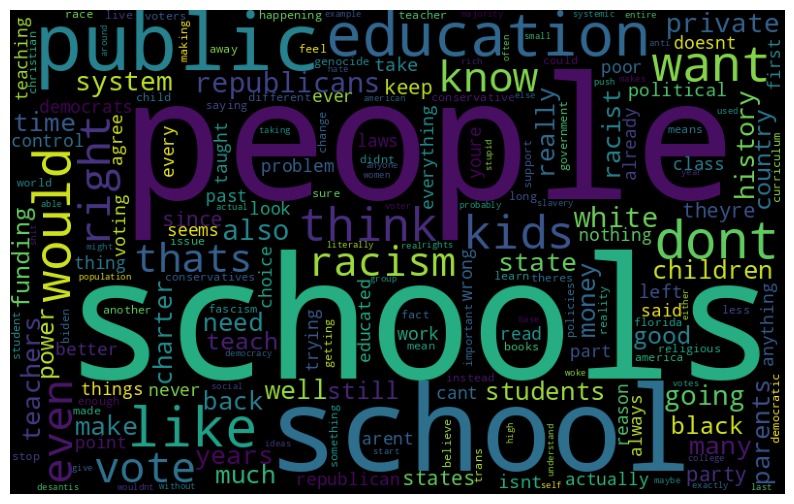

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

# Combine all the words in the 'body' column of the SentimentAnalysisFilteredData DataFrame into a single string
all_words = ' '.join([text for text in SentimentAnalysisFilteredData['Body']])
# Count the frequency of each word in the string and create a dictionary
count_word = collections.Counter(all_words.split())
# Create a WordCloud object with specified width and height
wordcloud = WordCloud(width=800, height=500)
# Generate the word cloud using the frequency dictionary
wordcloud.generate_from_frequencies(count_word)
# Set the size of the plot
plt.figure(figsize=(10, 7)) # In inches
# Display the word cloud image
plt.imshow(wordcloud)
# Turn off the x and y axes
plt.axis("off")
# Show the plot
plt.show()

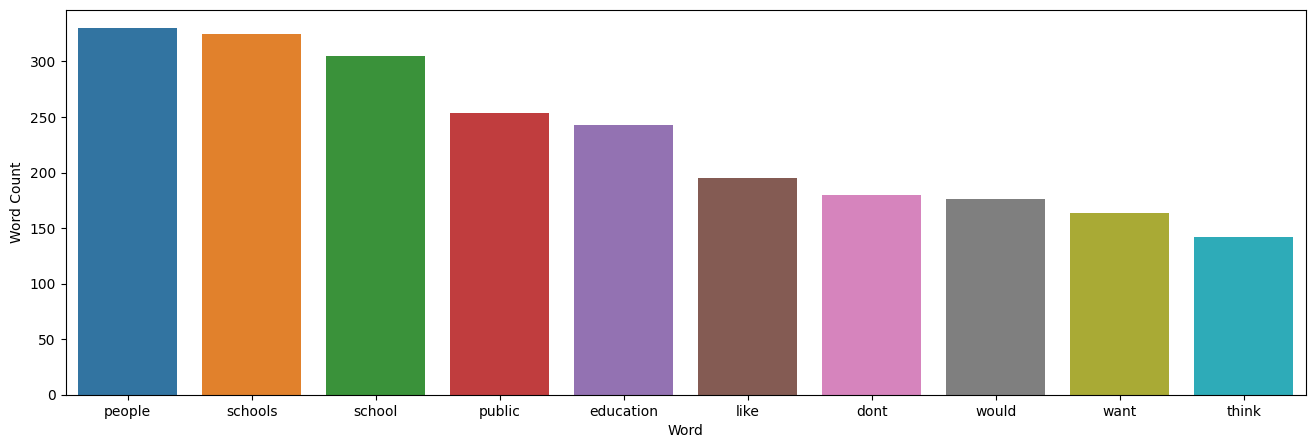

In [ ]:
# Make a bar chart of the top 10 words

# create a frequency distribution of words
word_freq = nltk.FreqDist(count_word)
# create a pandas dataframe from the word frequency distribution
word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()),
                             'Count': list(word_freq.values())})
# select the top 10 most frequent words 
top_words_df = word_freq_df.nlargest(columns="Count", n=10)
# create a bar plot of the top 10 most frequent words
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_words_df, x="Word", y="Count")
ax.set(ylabel='Word Count')
plt.show()

**Polarity And Subjectivity**

In [ ]:
#Import Necessary Library
from textblob import TextBlob   
#Using the Library report the Polarity and Subjectivity of the Data by creating new columns. 
SentimentAnalysisFilteredData['polarity'] = SentimentAnalysisFilteredData['Body'].apply(lambda z: TextBlob(z).sentiment.polarity)
SentimentAnalysisFilteredData['subjectivity'] = SentimentAnalysisFilteredData['Body'].apply(lambda y: TextBlob(y).sentiment.subjectivity)
SentimentAnalysisFilteredData.head()

,Body,ID,Score,Date/Time,Date,tokenized,polarity,subjectivity
0,reminder subreddit politics wiki index general...,jcxulbs,1,2023-03-20 12:03:02,2023-03-20,"[remind, subreddit, polit, wiki, index, gener,...",-0.010000,0.560000
1,theyve waging public education since least cha...,jcxwnz4,2442,2023-03-20 12:23:28,2023-03-20,"[theyv, wage, public, educ, sinc, least, chart...",-0.129000,0.498167
2,earlier month washington post reported teacher...,jcy2u23,1039,2023-03-20 13:18:11,2023-03-20,"[earlier, month, washington, post, report, tea...",-0.080612,0.540816
3,educated electorate gops worst political enemy,jcxumpx,1856,2023-03-20 12:03:26,2023-03-20,"[educ, elector, gop, worst, polit, enemi]",-0.500000,0.550000
4,coordinating guess alec american legislative e...,jcxx1jj,330,2023-03-20 12:27:15,2023-03-20,"[coordin, guess, alec, american, legisl, excha...",0.416667,0.483333


As the polarity ranges from -1 to 1, we could classify the polarity of each comment by using a function.

In [ ]:
# Create a function to classify the polarity
def PolarityClassification(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity 
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

In [ ]:
#Using the function created we can create a new column known as Sentiment which shows the classification for each comment
SentimentAnalysisFilteredData['sentiment'] = SentimentAnalysisFilteredData['Body'].apply(PolarityClassification)
SentimentAnalysisFilteredData.head()

,Body,ID,Score,Date/Time,Date,tokenized,polarity,subjectivity,sentiment
0,reminder subreddit politics wiki index general...,jcxulbs,1,2023-03-20 12:03:02,2023-03-20,"[remind, subreddit, polit, wiki, index, gener,...",-0.010000,0.560000,Negative Sentiment
1,theyve waging public education since least cha...,jcxwnz4,2442,2023-03-20 12:23:28,2023-03-20,"[theyv, wage, public, educ, sinc, least, chart...",-0.129000,0.498167,Negative Sentiment
2,earlier month washington post reported teacher...,jcy2u23,1039,2023-03-20 13:18:11,2023-03-20,"[earlier, month, washington, post, report, tea...",-0.080612,0.540816,Negative Sentiment
3,educated electorate gops worst political enemy,jcxumpx,1856,2023-03-20 12:03:26,2023-03-20,"[educ, elector, gop, worst, polit, enemi]",-0.500000,0.550000,Negative Sentiment
4,coordinating guess alec american legislative e...,jcxx1jj,330,2023-03-20 12:27:15,2023-03-20,"[coordin, guess, alec, american, legisl, excha...",0.416667,0.483333,Positive Sentiment


A similar thing can be done for subjectivity. As subjectivity ranges from 0 to 1, we can classify each comment again into whether it is objective or subjective.

In [ ]:
#Creating A Subjectivity Classification Column
SentimentAnalysisFilteredData['SubjectivityClassification'] = np.where(SentimentAnalysisFilteredData['subjectivity'] > 0.5, 'Subjective', 'Objective')
SentimentAnalysisFilteredData.head()

,Body,ID,Score,Date/Time,Date,tokenized,polarity,subjectivity,sentiment,SubjectivityClassification
0,reminder subreddit politics wiki index general...,jcxulbs,1,2023-03-20 12:03:02,2023-03-20,"[remind, subreddit, polit, wiki, index, gener,...",-0.010000,0.560000,Negative Sentiment,Subjective
1,theyve waging public education since least cha...,jcxwnz4,2442,2023-03-20 12:23:28,2023-03-20,"[theyv, wage, public, educ, sinc, least, chart...",-0.129000,0.498167,Negative Sentiment,Objective
2,earlier month washington post reported teacher...,jcy2u23,1039,2023-03-20 13:18:11,2023-03-20,"[earlier, month, washington, post, report, tea...",-0.080612,0.540816,Negative Sentiment,Subjective
3,educated electorate gops worst political enemy,jcxumpx,1856,2023-03-20 12:03:26,2023-03-20,"[educ, elector, gop, worst, polit, enemi]",-0.500000,0.550000,Negative Sentiment,Subjective
4,coordinating guess alec american legislative e...,jcxx1jj,330,2023-03-20 12:27:15,2023-03-20,"[coordin, guess, alec, american, legisl, excha...",0.416667,0.483333,Positive Sentiment,Objective


**Summary Statistics**

We can start of by looking at the Summary Statistics for each variable. 

In [ ]:
# Summary Statistics of Polarity and Subjectivity
Summary = SentimentAnalysisFilteredData[["polarity", "subjectivity"]]
Summary.describe()        

,polarity,subjectivity
count,1217.000000,1217.000000
mean,0.024115,0.360694
std,0.235935,0.282046
min,-1.000000,0.000000
25%,-0.030612,0.050000
50%,0.000000,0.380000
75%,0.125000,0.536111
max,1.000000,1.000000


We can now create frequency tables for Polarity and Subjectivity based on their classifications. 

In [ ]:
#Frequency Table for Polarity Classification
SentimentAnalysisFilteredData.sentiment.value_counts()

Positive Sentiment    507
Neutral Sentiment     374
Negative Sentiment    336
Name: sentiment, dtype: int64

507 comments have a positive sentiment, 374 comments have a neutral sentiment, and 336 comments have a negative sentiment.

In [ ]:
#Frequency Table for Subjectivity Classification
SentimentAnalysisFilteredData.SubjectivityClassification.value_counts()

Objective     844
Subjective    373
Name: SubjectivityClassification, dtype: int64

844 comments are objective while 399 comments are subjective. 

Finally, to see a relationship between the two we can create a cross-tab. 

In [ ]:
# Crosstabs
pd.crosstab(SentimentAnalysisFilteredData['sentiment'], SentimentAnalysisFilteredData['SubjectivityClassification'])

SubjectivityClassification,Objective,Subjective
sentiment,,
Negative Sentiment,169,167
Neutral Sentiment,360,14
Positive Sentiment,315,192


**Exploratory Analysis**

We can start off the Exploratory Analysis by producing histograms that show the distribution of Polarity and Subjectivity

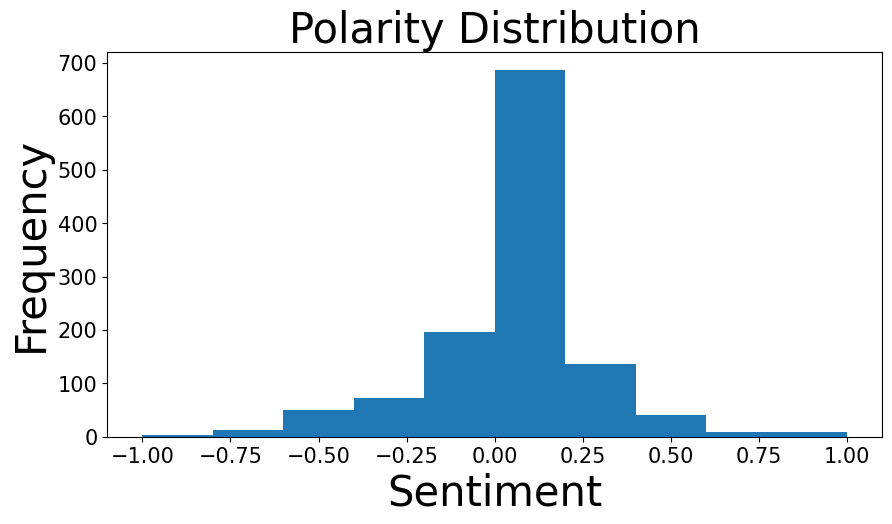

In [ ]:
#Histogram Showing Polarity Distribution 
plt.figure(figsize=(10,5))
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(SentimentAnalysisFilteredData['polarity'], bins=10)
plt.title('Polarity Distribution', fontsize=30)
plt.show()

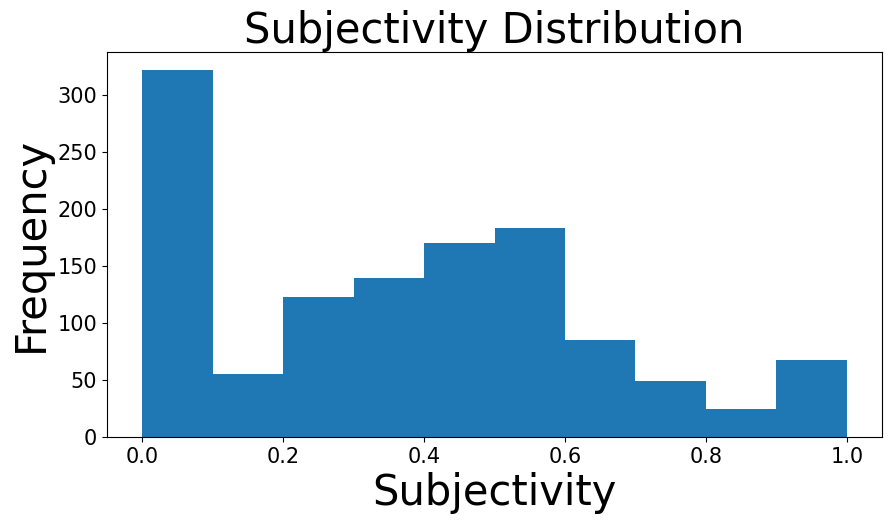

In [ ]:
#Histogram Showing Subjectivity Distribution
plt.figure(figsize=(10,5))
plt.xlabel('Subjectivity', fontsize=30)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=15)
plt.hist(SentimentAnalysisFilteredData['subjectivity'], bins=10)
plt.title('Subjectivity Distribution', fontsize=30)
plt.show()

Finally, we can create a scatterplot to see if the outcome matches the histograms.

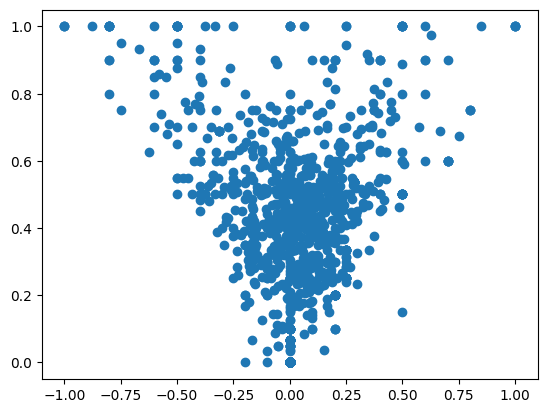

In [ ]:
plt.scatter(SentimentAnalysisFilteredData['polarity'], SentimentAnalysisFilteredData['subjectivity'])

This wraps up the Sentiment Analysis aspect. 